In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv("cardio_train.csv", sep=';')

In [30]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [34]:
df.shape

(70000, 13)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [38]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
df['age'] = (df['age'] / 365).round(1)

In [42]:
df = df[(df['ap_hi'] <= 250) & (df['ap_hi'] >= 50)]
df = df[(df['ap_lo'] <= 200) & (df['ap_lo'] >= 30)]
df = df[df['ap_hi'] >= df['ap_lo']]

In [44]:
df = df[(df['height'] >= 100) & (df['height'] <= 220)]
df = df[(df['weight'] >= 30) & (df['weight'] <= 200)]

In [46]:
print("Kalan satır sayısı:", len(df))
df.describe()

Kalan satır sayısı: 68647


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68647.000000,68647.000000,68647.000000,68647.000000,68647.000000,68647.000000,68647.000000,68647.000000,68647.000000,68647.000000,68647.000000,68647.000000,68647.000000
mean,49975.457762,53.328073,1.348624,164.394977,74.121169,126.675470,81.303669,1.364692,1.225778,0.087943,0.053345,0.803356,0.494734
std,28846.410169,6.761811,0.476538,7.976954,14.308114,16.695963,9.466643,0.678896,0.571641,0.283214,0.224723,0.397464,0.499976
min,0.000000,29.600000,1.000000,100.000000,30.000000,60.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25001.000000,48.400000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50019.000000,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74869.500000,58.400000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,65.000000,2.000000,207.000000,200.000000,240.000000,182.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
categorical_cols = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

for col in categorical_cols:
    print(f"\n{col} dağılımı:")
    print(df[col].value_counts(normalize=True) * 100)


gender dağılımı:
gender
1    65.137588
2    34.862412
Name: proportion, dtype: float64

cholesterol dağılımı:
cholesterol
1    74.990895
2    13.549026
3    11.460078
Name: proportion, dtype: float64

gluc dağılımı:
gluc
1    85.020467
3     7.598293
2     7.381240
Name: proportion, dtype: float64

smoke dağılımı:
smoke
0    91.205734
1     8.794266
Name: proportion, dtype: float64

alco dağılımı:
alco
0    94.665462
1     5.334538
Name: proportion, dtype: float64

active dağılımı:
active
1    80.33563
0    19.66437
Name: proportion, dtype: float64

cardio dağılımı:
cardio
0    50.526607
1    49.473393
Name: proportion, dtype: float64


In [50]:
df['gender'] = df['gender'].map({1: 'Kadın', 2: 'Erkek'})

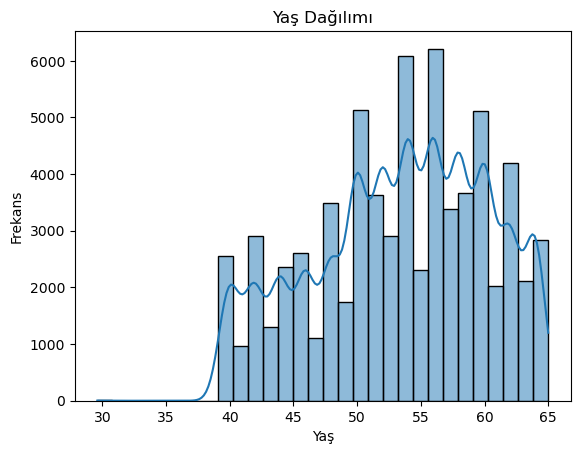

In [52]:
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Yaş Dağılımı")
plt.xlabel("Yaş")
plt.ylabel("Frekans")
plt.show()

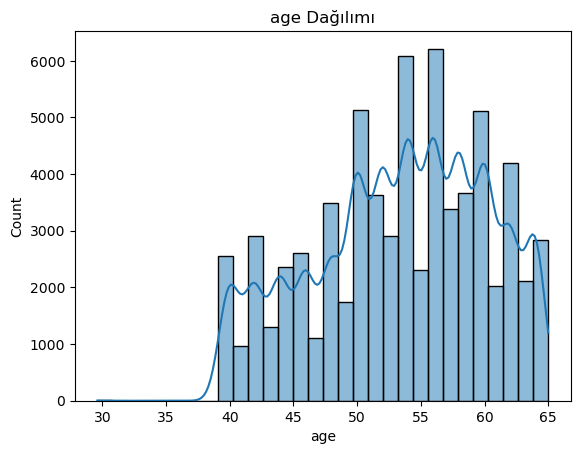

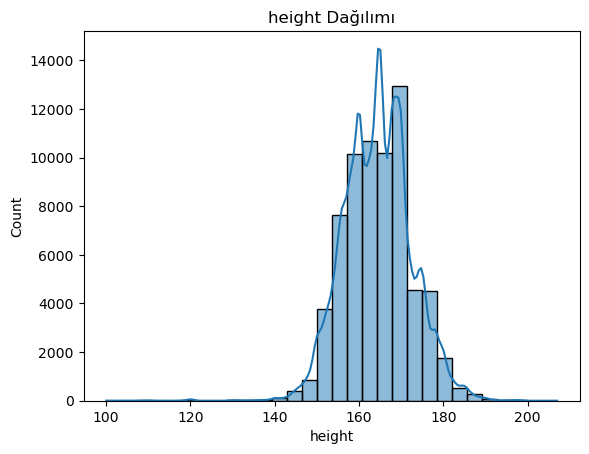

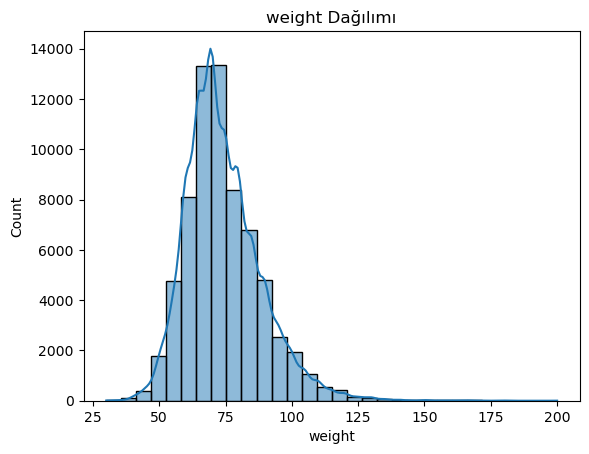

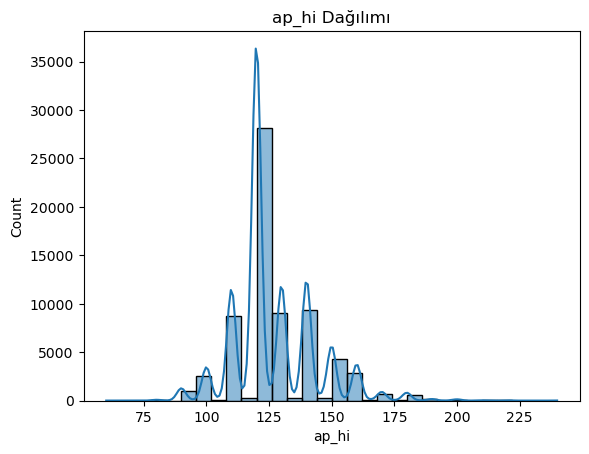

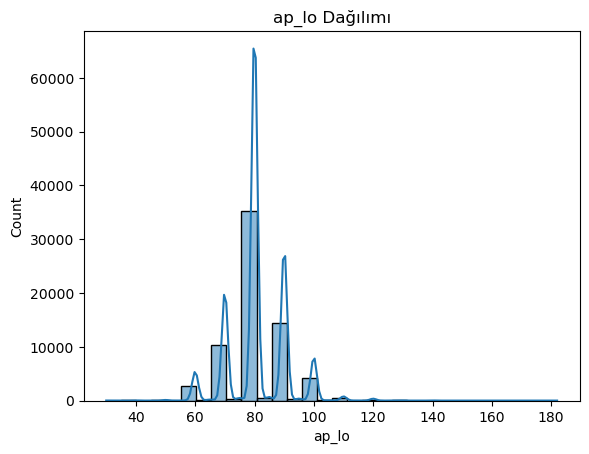

In [58]:
sayisal_degiskenler = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
for sutun in sayisal_degiskenler:
    sns.histplot(df[sutun], bins= 30, kde=True)
    plt.title(f"{sutun} Dağılımı")
    plt.show()

<Axes: xlabel='cardio', ylabel='age'>

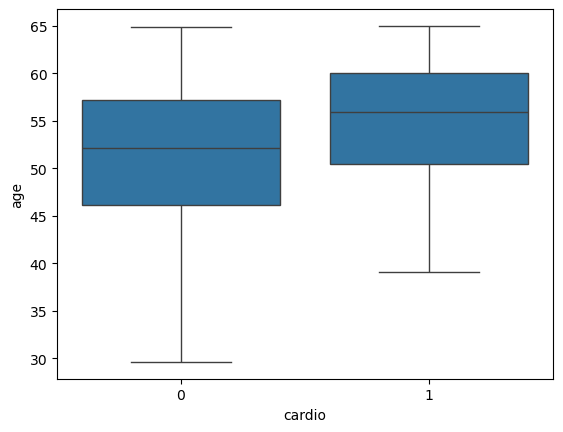

In [60]:
sns.boxplot(x='cardio', y='age', data=df)

In [64]:
korelasyon_matrisi = df[sayisal_degiskenler].corr()

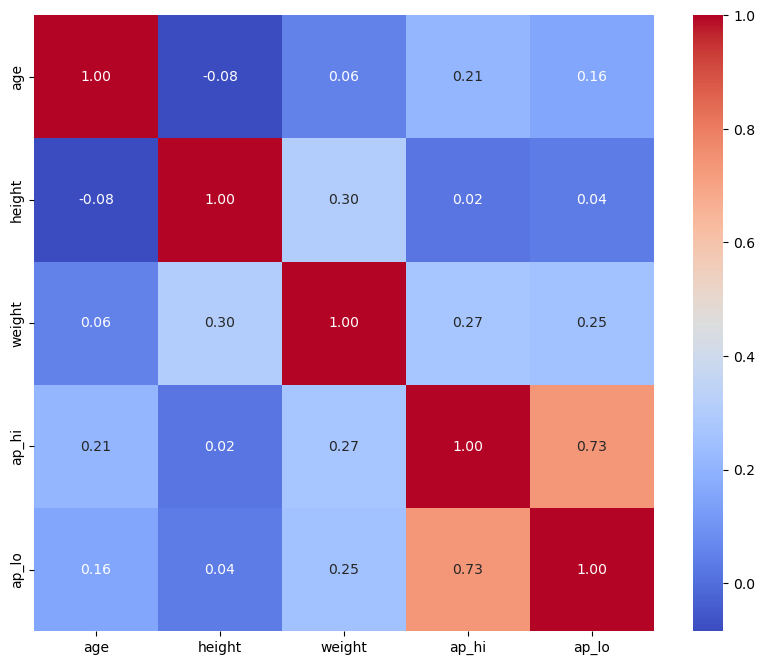

In [66]:
plt.figure(figsize=(10, 8))

sns.heatmap(korelasyon_matrisi, annot=True, cmap='coolwarm', fmt='.2f')

plt.show()

In [68]:
sayisal_degiskenler.append('cardio')

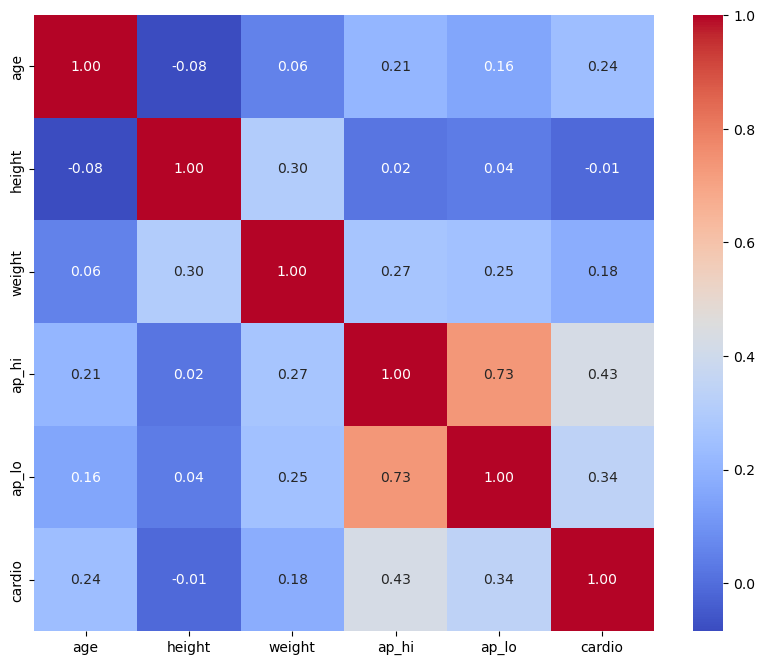

In [70]:
yeni_korelasyon_matrisi = df[sayisal_degiskenler].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(yeni_korelasyon_matrisi, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [72]:
df.to_csv("cleaned_cardio_data.csv", index=False)